In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy import exp, heaviside, pi, log as ln
from scipy.special import gamma, factorial as fac
th = lambda x : heaviside(x, 1/2)

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [3]:
r0 = -1
u0 = 1

n = 10
phi_max = 4.
phi = np.linspace(-phi_max, phi_max, n, dtype=np.longdouble)
dp = phi[1] - phi[0]
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)

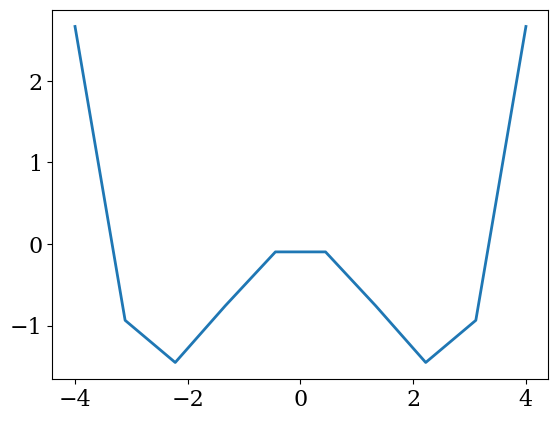

In [4]:
plt.plot(phi, U0)

In [5]:
def D(U, dp):
    DU = np.zeros_like(U)
    DU[1:-1] = (U[2:] - U[:-2])/2 /  dp
    DU[+0] = +(-1/2 * U[+2] + 2 * U[+1] - 3/2*U[+0]) / dp
    DU[-1] = -(-1/2 * U[-3] + 2 * U[-2] - 3/2*U[-1]) / dp
    return DU

def DD(U, dp):
    DDU = np.zeros_like(U)
    DDU[1:-1] = (U[2:] + U[:-2] - 2 * U[1:-1]) / (dp)**2 
    DDU[+0] = +(-U[+3] + 4*U[+2] - 5*U[+1] + 2*U[+0]) / dp**2
    DDU[-1] = +(-U[-4] + 4*U[-3] - 5*U[-2] + 2*U[-1]) / dp**2
    return DDU

In [6]:
def D2(U, dx):
    DU = np.zeros_like(U)
    DU[+2:-2] = +(-1/12*U[4:] + 2/3*U[3:-1] - 2/3*U[1:-3] + 1/12*U[:-4]) / dx
    DU[+0:+2] = +(-1/4*U[+4:+6] + 4/3*U[+3:+5] - 3*U[+2:+4] + 4*U[+1:+3] - 25/12*U[+0:+2]) / dx
    DU[-2:  ] = -(-1/4*U[-6:-4] + 4/3*U[-5:-3] - 3*U[-4:-2] + 4*U[-3:-1] - 25/12*U[-2:  ]) / dx
    return DU

def DD2(U, dx):
    DDU = np.zeros_like(U)
    DDU[+2:-2] = (-1/12*(U[4:]+U[:-4]) + 4/3*(U[3:-1]+U[1:-3]) -5/2* U[2:-2]) / dx**2 
    DDU[+0:+2] = (-5/6*U[+5:+7] + 61/12*U[+4:+6] - 13*U[+3:+5] + 107/6*U[+2:+4] - 77/6*U[+1:+3] + 15/4*U[+0:+2]) / dx**2
    DDU[-2:  ] = (-5/6*U[-7:-5] + 61/12*U[-6:-4] - 13*U[-5:-3] + 107/6*U[-4:-2] - 77/6*U[-3:-1] + 15/4*U[-2:  ]) / dx**2
    return DDU

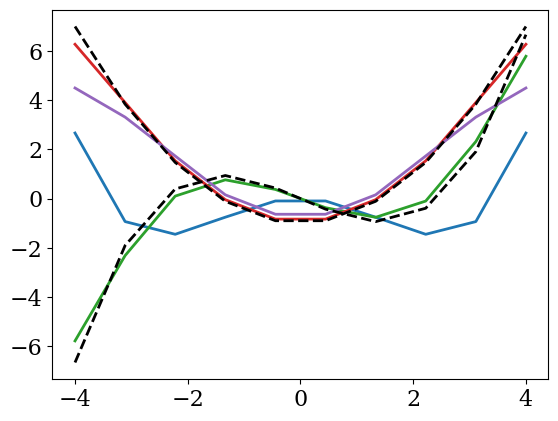

In [8]:
plt.plot(phi, U0, dp)
plt.plot(phi, D(U0,dp))
plt.plot(phi, DD(U0,dp))
plt.plot(phi, D(D(U0,dp),dp))

plt.plot(phi, D2(U0,dp), 'k--')
plt.plot(phi, DD2(U0,dp), "k--")

In [9]:
C = lambda d : 2/d * 2/(4*pi)**(d/2)/gamma(2/d)

def F(U, phi, dp, d=3):
    return -d * U + (d-2)/2 * phi * D2(U, dp) - C(d) / (1 + DD2(U, dp))

In [10]:
r0 = 1
u0 = 1

n = 100
phi_max = 4.
phi = np.linspace(-phi_max, phi_max, n, dtype=np.float32)
dp = phi[1] - phi[0]
U0 = r0 * phi**2 / 2 + u0 * phi**4 / (4 * 3 * 2)

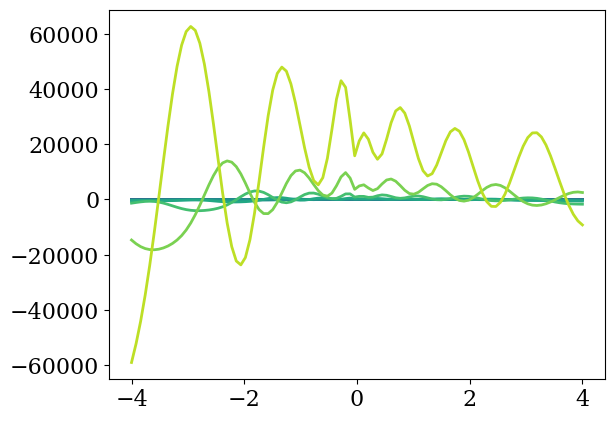

In [11]:
dt = 0.0001
N = 10
M = 5_000
d = 3


r0 = -.1
u0 = 0.2
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4) #+ (2) / fac(6) * phi**6
U = U0

fig, ax = plt.subplots()

for i in range(N):
    for j in range(M):
        U = U - F(U, phi, dp, d=d) * dt
    ax.plot(phi, U, color=cm.viridis(i/N))

# ax.set_ylim(-3, 5)

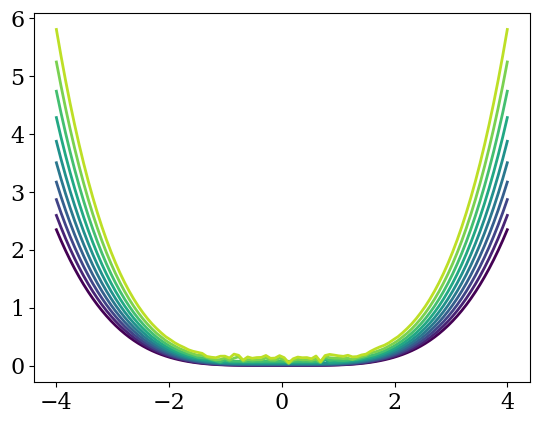

In [227]:
dt = 0.00001
N = 10
M = 10_000
d = 3


r0 = -.001
u0 = 0.2
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4) #+ (2) / fac(6) * phi**6
U = U0

fig, ax = plt.subplots()

for i in range(N):
    for j in range(M):
        U = U - F(U, phi, dp, d=d) * dt
    ax.plot(phi, U, color=cm.viridis(i/N))

# ax.set_ylim(-3, 5)